<a href="https://colab.research.google.com/github/somezzedup/EDA-Projects/blob/main/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#!pip install plotly --upgrade

import folium
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape

(52926, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
# creating the var ny_df
# which will contain rows only if they match
# the state column having 'New York'
ny_df = df[df['state']=='New York']
az_df = df[df['state']=='Arizona']
ca_df = df[df['state']=='California']
fl_df = df[df['state']=='Florida']
tx_df = df[df['state']=='Texas']

In [ ]:
# preview of the data 
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
# the shape is 683 rows and 5 columns
# columns are date, state, fips, cases, deaths
ny_df.shape

(957, 5)

In [ ]:
# the tail of the data is shown
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.tail()

,date,state,fips,cases,deaths
52680,2022-10-09,New York,36,6143840,71257
52736,2022-10-10,New York,36,6145553,71257
52792,2022-10-11,New York,36,6154746,71298
52848,2022-10-12,New York,36,6158609,71373
52904,2022-10-13,New York,36,6163421,71422


In [ ]:
#first death in NY
# first_ny_death dataframe shows us where deaths are not equal to 0
# so every row here will contain of at least 1 death
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
# total  hight number of cases
ny_df['cases'].max()

6163421

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previous_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ny_df.head()

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11


In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths,new_cases
52680,2022-10-09,New York,36,6143840,71257,2178
52736,2022-10-10,New York,36,6145553,71257,1713
52792,2022-10-11,New York,36,6154746,71298,9193
52848,2022-10-12,New York,36,6158609,71373,3863
52904,2022-10-13,New York,36,6163421,71422,4812


In [ ]:
ny_df

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
...,...,...,...,...,...,...
52680,2022-10-09,New York,36,6143840,71257,2178
52736,2022-10-10,New York,36,6145553,71257,1713
52792,2022-10-11,New York,36,6154746,71298,9193
52848,2022-10-12,New York,36,6158609,71373,3863


In [ ]:
# count total cases
ny_df['new_cases'].sum()

6163421

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

In [ ]:


# passing the .Figure function from plotly 

fig = go.Figure()

# assigning the x-axis and y-axis for deaths in the ny dataframe
# this will be the graph in the 'back' showing the cumulative deaths
# in blue
fig.add_trace(go.Bar( x = ny_df['date'],
                      y = ny_df['deaths'],
                     name = 'deaths'
                     ))

# assigning the x-axis and the y-axis for new cases of infection, from the 
# previous day
# this will be the graph in the 'front' showing the new cases

fig.add_trace(go.Bar(x = ny_df['date'],
                     y = ny_df['new_cases'],
                     name = 'new cases'
                     ))

# the title is named here, and the size of the chart is set to 1920x1080
# font size is set to 30
fig.update_layout(title = "Deaths to New Cases",
               barmode = "overlay",
               title_font_size = 30,
               width = 1920,
               height = 1080)
# X axis is updated to Date
fig.update_xaxes(
                title_text = 'Date'
)
# Y axis is updated to 'Count of each'
fig.update_yaxes(
                title_text = 'Count'
)
# How does every new case of covid impact the death rate
# we see that there is a lag in death with when we see an amount of infections
# we can also see the timeline when the vaccine was introduced and the death
# rate was minimized 

In [ ]:
# graph that displays the total cases by date in New York
# ny_df is the dataframe
# x is the date
# y is the cases
# we are using the column state which contains only New York
fig = px.area(ny_df,x='date', y='cases', facet_col="state", facet_col_wrap=2)
fig.show()

In [ ]:
# this graph is showing the new cases by date
# we gain some insight in this because we can notice some peaks and valleys
# in the data, to see time periods where new cases are surging, and 
# time periods when new cases are falling off
# Thus, we can see that during warmer months, the new cases stagnant
# but in colder months, and months like Oct-Dec that have many holidays
# where people gather together
# new cases of covid in NY increase each time 

fig = px.bar(ny_df, x='date', y='new_cases', color ='new_cases', orientation ='v', height = 600,
             title = 'cases in New York', color_discrete_sequence= px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230 ,230)')
fig.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

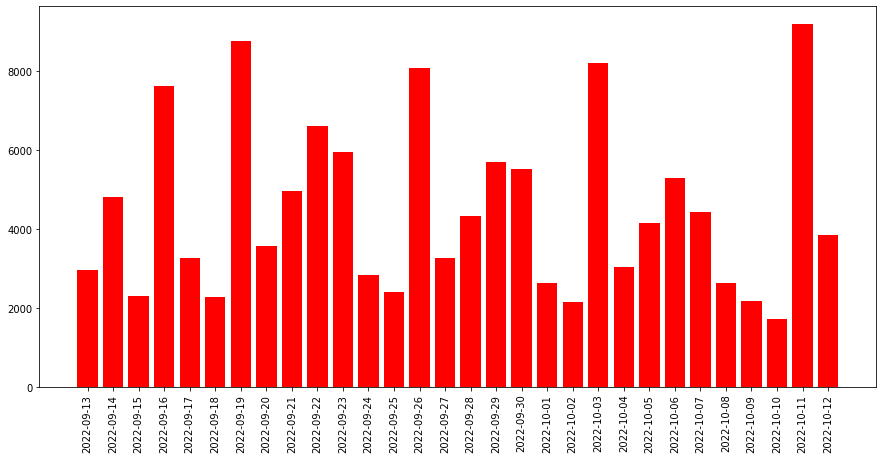

In [ ]:
#Creates a graph of cases in NY from last 30 days
#Specifies the width as 15 and heigt as 7 inches
#Rotates x-axis labels by 90 degrees
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# plt.figure(figsize = (15, 7))
fig = px.bar(x = ny_dates_30, y = ny_new_cases_30,
            labels = dict(x = "NY New Cases from Last 30 days,",
                           y = "Amount of New Cases"))
fig.update_xaxes(range=["2022-09-14", "2022-10-13"])
fig.update_yaxes(range=[0, 90000])

fig.show()

# Number of new cases in NY from Dec 14 - Jan 11
# we are not sure of the anomaly that appears for Dec 25
# possibly the system for recording went down or was corrupted
# or maybe santa was good to everyone and gave the gift of no new cases

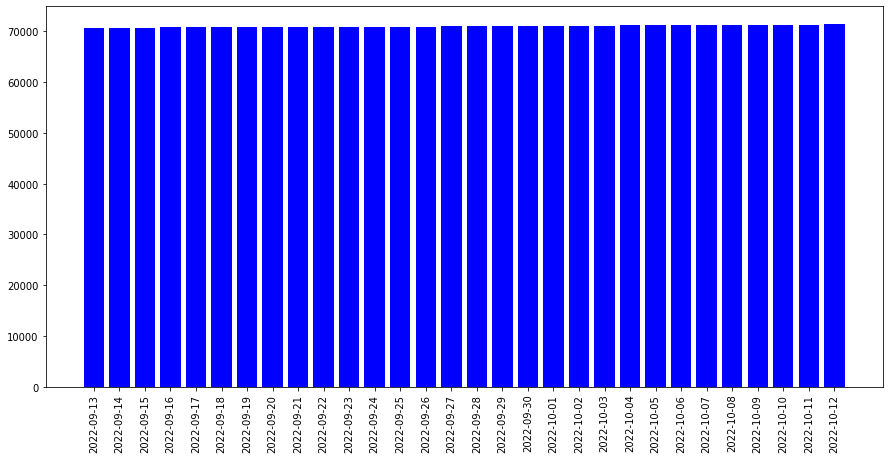

In [ ]:
#Creates a graph of deaths in NY from 12/12-1/11
#Specifies the width as 15 and height as 7 inches
#Rotates x-axis labels by 90 degrees
# change the scale of the y axis to exaggerate the increases in deaths
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# plt.figure(figsize = (15, 7))
fig = px.bar(x = ny_dates_30, y = ny_deaths_30,
             labels = dict(x = "NY Deaths from 09/14/2022 through 10/13/2022,",
                           y = "Cumulative Deaths"))
fig.update_yaxes(range=[55000, 62000])
fig.update_xaxes(range=["2022-09-14", "2022-10-13"])

fig.show()

# this graph is showing NY days in a 30 day period in a cumulative format
# please note, the y axis is not starting from 0 and the range is adjusted
# to visually exaggerate the increase for the viewer
# but the actual change in terms of percentage is smaller than you may perceive

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
#States the states that are used for comparison
states = ['New York', 'California','Florida', 'Texas','Arizona']

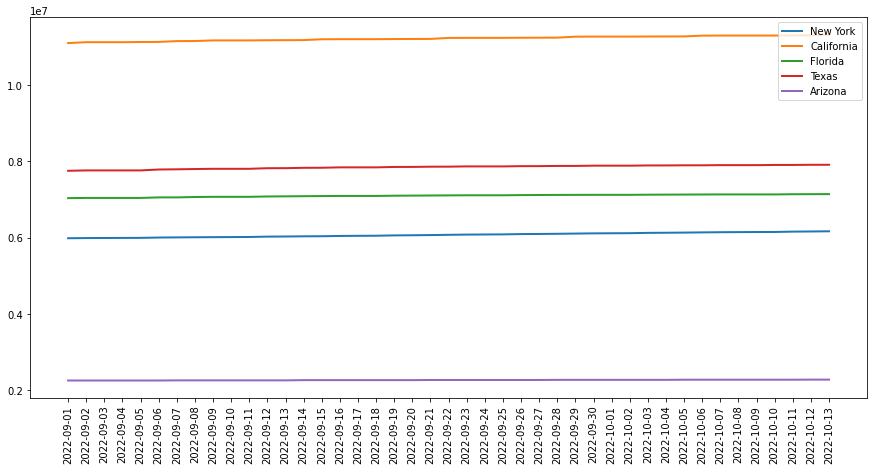

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2022-09-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()

#Change the start date from November to July
#Change the graph

In [ ]:
df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [ ]:
df_july = df[df.state.isin(states) & (df['date']>='2020-07-01')]

In [ ]:
df_july

,date,state,fips,cases,deaths
6616,2020-07-01,Arizona,4,84152,1726
6618,2020-07-01,California,6,239764,6168
6623,2020-07-01,Florida,12,158989,3549
6647,2020-07-01,New York,36,398770,31791
6660,2020-07-01,Texas,48,174826,2518
...,...,...,...,...,...
52873,2022-10-13,Arizona,4,2277635,31455
52875,2022-10-13,California,6,11316736,96442
52880,2022-10-13,Florida,12,7137526,81865
52904,2022-10-13,New York,36,6163421,71422


In [ ]:
# Comparing 3 states 


from plotly.subplots import make_subplots

fig = make_subplots(
    rows = 2 , cols = 2,
    specs = [[{}, {}],
             [{'colspan': 2}, None]],
    subplot_titles= ( 'California', 'New York', 'Texas'))

fig.add_trace(go.Bar(x=ca_df['date'], y=ca_df['cases'],
                     marker = dict(color = ca_df['cases'], coloraxis='coloraxis')), 1, 1)

fig.add_trace(go.Bar(x=ny_df['date'], y=ny_df['cases'],
                     marker = dict(color = ny_df['cases'], coloraxis='coloraxis')), 1, 2)

fig.add_trace(go.Bar(x=tx_df['date'], y=tx_df['cases'],
                     marker = dict(color = tx_df['cases'], coloraxis='coloraxis')), 2, 1)

fig.update_layout(coloraxis = dict(colorscale='Bluered_r'), showlegend = False, title_text = 'Total Confirmed Cases(cumulative)')

fig.update_layout(plot_bgcolor = 'rgb(230, 230, 230)')

fig.show()
                     
            

# Conclusion

Below are the conclusions:



1.   Conclusion 1
     There was an aggressive slope when covid19 was first being logged and stored. People did not know how infectious the virus was. Death is not instant and takes a period of time for an infected to potentially die. This is represented in the lag between new cases and increase in cumulative deaths.
2.   Conclusion 2
    When looking at some other states such as Arizona, we see that while the amount of people living there is smaller than NY,CA,TX, and FL. The slope movement is relatively the same over a long period of time. This does not mean that the slope increase is the same, just that if cases are rising in the other states, AZ will experience an increase in cases as well.

